<a href="https://colab.research.google.com/github/chetannitk/Tensorflow-2.0-Quick-Start-Guide/blob/master/Chapter02/Chapter2_Keras_ModelBySubclassingModel_TF2_alpha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras model by subclassing Model

In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.mnist
(train_x,train_y), (test_x, test_y) = mnist.load_data()
train_x, test_x = train_x/255.0, test_x/255.0
epochs=10

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
class MyModel(tf.keras.Model):
    def __init__(self, num_classes=10):
        super(MyModel, self).__init__()
   # Define your layers here.
        inputs = tf.keras.Input(shape=(28,28))  # Returns a placeholder tensor
        self.x0 = tf.keras.layers.Flatten()
        self.x1 = tf.keras.layers.Dense(512, activation='relu',name='d1')
        self.x2 = tf.keras.layers.Dropout(0.2)
        self.predictions = tf.keras.layers.Dense(10,activation=tf.nn.softmax, name='d2')
    def call(self, inputs):
   # This is where to define your forward pass using the functional API style
   # using layers  previously defined in `__init__`
        x = self.x0(inputs)
        x = self.x1(x)
        x = self.x2(x)
        return self.predictions(x)


In [0]:
model4 = MyModel()


In [5]:
optimiser = tf.keras.optimizers.Adam()
model4.compile (optimizer= optimiser, loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
model4.fit(train_x, train_y, batch_size=32, epochs=epochs)
    #model4.evaluate(test_x, test_y)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2216 - accuracy: 0.9346
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0983 - accuracy: 0.9692
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0692 - accuracy: 0.9787
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0543 - accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0420 - accuracy: 0.9863
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0354 - accuracy: 0.9881
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0295 - accuracy: 0.9901
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0265 - accuracy: 0.9909
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0252 - accuracy: 0.9912
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.022

In [6]:
model4.evaluate(test_x, test_y)

313/313 [==============================] - 0s 2ms/step - loss: 0.0746 - accuracy: 0.9805


[0.07456740736961365, 0.9804999828338623]

In [7]:
model4.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
d1 (Dense)                   multiple                  401920    
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
d2 (Dense)                   multiple                  5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [0]:
test_pred = model4.predict(test_x)

In [9]:
test_pred

array([[1.6393623e-10, 2.1400316e-11, 1.0203359e-08, ..., 9.9997723e-01,
        1.5024700e-11, 3.7155491e-08],
       [4.8794491e-17, 4.9137755e-12, 1.0000000e+00, ..., 2.3420077e-24,
        7.6440819e-15, 9.1978563e-24],
       [3.4619994e-11, 9.9998093e-01, 6.2703930e-06, ..., 2.4838772e-07,
        9.6696049e-06, 3.5694295e-11],
       ...,
       [1.1027623e-19, 3.1630130e-12, 8.3733632e-18, ..., 2.1398459e-09,
        3.6430614e-10, 6.0262022e-09],
       [1.9259637e-11, 4.2471086e-14, 1.9025354e-14, ..., 1.1201257e-13,
        3.4630425e-06, 3.6332585e-17],
       [1.2334076e-13, 8.8941909e-22, 5.2183222e-15, ..., 1.2507628e-25,
        1.1108069e-16, 1.9781891e-16]], dtype=float32)

In [13]:
model4.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
d1 (Dense)                   multiple                  401920    
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
d2 (Dense)                   multiple                  5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [18]:
print("Total number od layers in the model : {}".format(len(model4.layers)))

Total number od layers in the model : 4


In [28]:
model4.layers[1].weights[0].shape

TensorShape([784, 512])

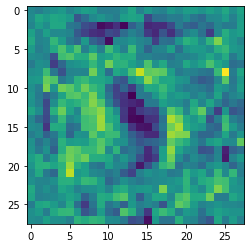

In [36]:
import matplotlib.pyplot as plt
plt.imshow(model4.layers[1].weights[0][:,8].numpy().reshape((28,28)))